In [20]:
import ROOT
import os
import numpy as np
import pandas as pd

In [21]:
saveDir = "checkSaturatedEvents_v2"
try:
    os.mkdir(saveDir)
except OSError as error:
    print(error) 
    print("Here: "+os.getcwd()+"/"+saveDir)

[Errno 17] File exists: 'checkSaturatedEvents_v2'
Here: /Users/slezki/working/na62/singleTracks/checkSaturatedEvents_v2


In [22]:
#ROOT.EnableImplicitMT(4)
rFile = "/Volumes/Buio/na62/data/singleTracks/checkSingleTracks_addDirectAssoc_v2_BD2021.root"
rTree = "singleTracks"
df = ROOT.RDataFrame(rTree,rFile)

In [23]:
baselineCuts = "Tracks_NewCHODTimeExist && Tracks_chi2<20"
#acceptance = "Tracks_accANTI0 == 1 && Tracks_accLAV12 == 1 && Tracks_accSTRAW0 == 1 && Tracks_accSTRAW1 == 1 && Tracks_accSTRAW2 == 1 && Tracks_accSTRAW3 == 1 && Tracks_accNewCHOD == 1 && Tracks_accLKr == 1 && Tracks_accMUV1 == 1 && Tracks_accMUV2 == 1 && Tracks_accMUV3 == 1 && Tracks_accCHOD == 1";
#trksCuts = "Tracks_chi2<20"

In [24]:
df_skim = df.Filter(baselineCuts)

In [25]:
df_skim = df_skim.Redefine("Tracks_p","Tracks_p*0.001")
df_skim = df_skim.Redefine("Tracks_lkrE","Tracks_lkrE*0.001")
df_skim = df_skim.Redefine("Tracks_lkrTotE","Tracks_lkrTotE*0.001")
df_skim = df_skim.Redefine("Tracks_muv1E","Tracks_muv1E*0.001")
df_skim = df_skim.Redefine("Tracks_muv2E","Tracks_muv2E*0.001")
df_skim = df_skim.Redefine("Tracks_CaloE","Tracks_CaloE*0.001")
df_skim = df_skim.Redefine("SeedEnergy_ds","SeedEnergy_ds*0.001")
df_skim = df_skim.Redefine("HighestNeighbourEnergy_ds","HighestNeighbourEnergy_ds*0.001")
df_skim = df_skim.Redefine("corrEnergy_ds","corrEnergy_ds*0.001")

In [26]:
df_skim = df_skim.Define("Tracks_caloEoP","Tracks_CaloE/Tracks_p")
df_skim = df_skim.Define("Tracks_muv1EoP","Tracks_muv1E/Tracks_p")
df_skim = df_skim.Define("Tracks_muv2EoP","Tracks_muv2E/Tracks_p")
df_skim = df_skim.Define("Tracks_muv12E","Tracks_muv1E+Tracks_muv2E")
df_skim = df_skim.Define("Tracks_muv12E_subs","Tracks_CaloE-Tracks_lkrE")
df_skim = df_skim.Define("Tracks_muv12EoP","Tracks_muv12E/Tracks_p")
df_skim = df_skim.Define("Tracks_muv12EoP_subs","Tracks_muv12E_subs/Tracks_p")
df_skim = df_skim.Define("BestClusterEOP","BestClusterEnergy/Tracks_p")

In [27]:
df_skim = df_skim.Define("Sat","Saturation")
df_skim = df_skim.Define("SeedE","SeedEnergy_ds")
df_skim = df_skim.Define("NeighbourE","HighestNeighbourEnergy_ds")
df_skim = df_skim.Define("DS_LKrE","Tracks_lkrE")
df_skim = df_skim.Define("BestClusE","BestClusterEnergy")
df_skim = df_skim.Define("corrEnergy","Saturation==1 ? (corrEnergy_ds-7)+70 : corrEnergy_ds")

In [28]:
df_skim = df_skim.Define("DeltaE","fabs(corrEnergy-Tracks_lkrE)")

In [29]:
df_muv12_f_or = df_skim.Filter("Tracks_MUV1AssociationExists==0 || Tracks_MUV2AssociationExists==0")
df_muv12_f_and = df_skim.Filter("Tracks_MUV1AssociationExists==0 && Tracks_MUV2AssociationExists==0")
df_muv12_t = df_skim.Filter("Tracks_MUV1AssociationExists==1 && Tracks_MUV2AssociationExists==1")

Warning in <TCanvas::Constructor>: Deleting canvas with same name: clkrVSmuv12_EoP_fOr
Info in <TCanvas::Print>: png file ./checkSaturatedEvents_v2/lkrVSmuv12_EoP_fOr.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: clkrVSmuv12_EoP_fAnd
Info in <TCanvas::Print>: png file ./checkSaturatedEvents_v2/lkrVSmuv12_EoP_fAnd.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: clkrVSmuv12_EoP_t
Info in <TCanvas::Print>: png file ./checkSaturatedEvents_v2/lkrVSmuv12_EoP_t.png has been created


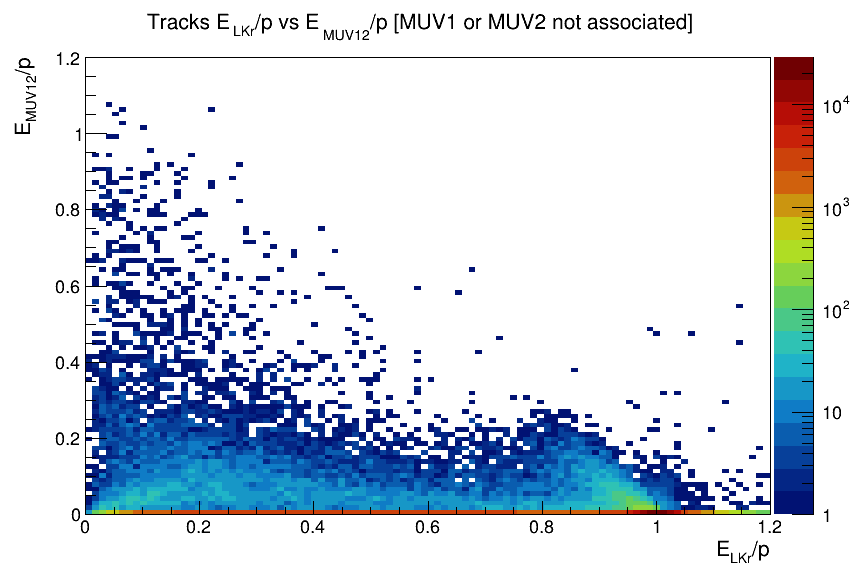

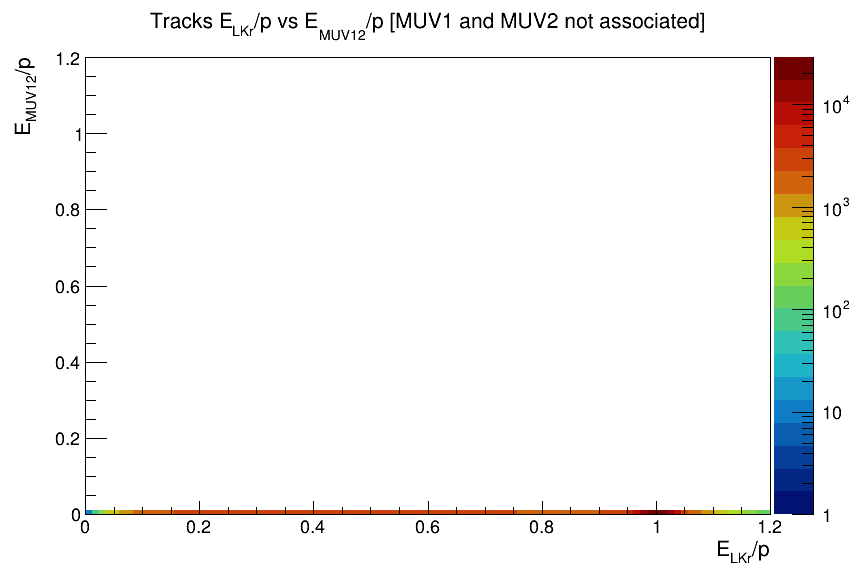

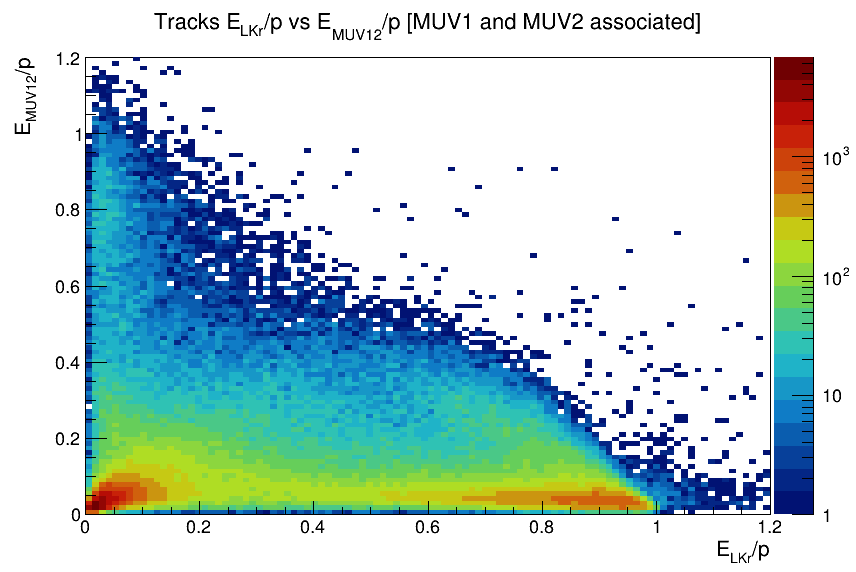

In [30]:
lkrVSmuv12_EoP_fOr = df_muv12_f_or.Histo2D(("lkrVSmuv12_EoP_fOr","lkrVSmuv12_EoP_fOr",100,0,1.2,100,0,1.2),"Tracks_lkrEoP","Tracks_muv12EoP")
clkrVSmuv12_EoP_fOr = ROOT.TCanvas("clkrVSmuv12_EoP_fOr","clkrVSmuv12_EoP_fOr",860,600)
clkrVSmuv12_EoP_fOr.SetLogz()
ROOT.gStyle.SetOptStat(0)
ROOT.gStyle.SetPalette(ROOT.kRainBow)
lkrVSmuv12_EoP_fOr.SetTitle("Tracks E_{LKr}/p vs E_{MUV12}/p [MUV1 or MUV2 not associated]")
lkrVSmuv12_EoP_fOr.GetXaxis().SetTitleSize(0.04)
lkrVSmuv12_EoP_fOr.GetYaxis().SetTitleSize(0.04)
lkrVSmuv12_EoP_fOr.SetXTitle("E_{LKr}/p")
lkrVSmuv12_EoP_fOr.SetYTitle("E_{MUV12}/p")
lkrVSmuv12_EoP_fOr.Draw("COLZ")
clkrVSmuv12_EoP_fOr.Draw()
clkrVSmuv12_EoP_fOr.SaveAs("./"+saveDir+"/lkrVSmuv12_EoP_fOr.png")

lkrVSmuv12_EoP_fAnd = df_muv12_f_and.Histo2D(("lkrVSmuv12_EoP_fAnd","lkrVSmuv12_EoP_fAnd",100,0,1.2,100,0,1.2),"Tracks_lkrEoP","Tracks_muv12EoP")
clkrVSmuv12_EoP_fAnd = ROOT.TCanvas("clkrVSmuv12_EoP_fAnd","clkrVSmuv12_EoP_fAnd",860,600)
clkrVSmuv12_EoP_fAnd.SetLogz()
ROOT.gStyle.SetOptStat(0)
ROOT.gStyle.SetPalette(ROOT.kRainBow)
lkrVSmuv12_EoP_fAnd.SetTitle("Tracks E_{LKr}/p vs E_{MUV12}/p [MUV1 and MUV2 not associated]")
lkrVSmuv12_EoP_fAnd.GetXaxis().SetTitleSize(0.04)
lkrVSmuv12_EoP_fAnd.GetYaxis().SetTitleSize(0.04)
lkrVSmuv12_EoP_fAnd.SetXTitle("E_{LKr}/p")
lkrVSmuv12_EoP_fAnd.SetYTitle("E_{MUV12}/p")
lkrVSmuv12_EoP_fAnd.Draw("COLZ")
clkrVSmuv12_EoP_fAnd.Draw()
clkrVSmuv12_EoP_fAnd.SaveAs("./"+saveDir+"/lkrVSmuv12_EoP_fAnd.png")

lkrVSmuv12_EoP_t = df_muv12_t.Histo2D(("lkrVSmuv12_EoP_t","lkrVSmuv12_EoP_t",100,0,1.2,100,0,1.2),"Tracks_lkrEoP","Tracks_muv12EoP")
clkrVSmuv12_EoP_t = ROOT.TCanvas("clkrVSmuv12_EoP_t","clkrVSmuv12_EoP_t",860,600)
clkrVSmuv12_EoP_t.SetLogz()
ROOT.gStyle.SetOptStat(0)
ROOT.gStyle.SetPalette(ROOT.kRainBow)
lkrVSmuv12_EoP_t.SetTitle("Tracks E_{LKr}/p vs E_{MUV12}/p [MUV1 and MUV2 associated]")
lkrVSmuv12_EoP_t.GetXaxis().SetTitleSize(0.04)
lkrVSmuv12_EoP_t.GetYaxis().SetTitleSize(0.04)
lkrVSmuv12_EoP_t.SetXTitle("E_{LKr}/p")
lkrVSmuv12_EoP_t.SetYTitle("E_{MUV12}/p")
lkrVSmuv12_EoP_t.Draw("COLZ")
clkrVSmuv12_EoP_t.Draw()
clkrVSmuv12_EoP_t.SaveAs("./"+saveDir+"/lkrVSmuv12_EoP_t.png")

# Reject $MUV12$ associations

In [31]:
df_muv12_f_and = df_skim.Filter("Tracks_MUV1AssociationExists==0 && Tracks_MUV2AssociationExists==0")

df_muv12_f_and_ = df_muv12_f_and.Filter("Sat==1")

disp_muv12_f_and_ = df_muv12_f_and_.Display(("EventID","Sat","SeedE","NeighbourE","DeltaE","DS_LKrE","corrEnergy"),100) 
disp_muv12_f_and_.Print()

# Check Downstream tracks $p$ and $E_{LKr}$

Warning in <TCanvas::Constructor>: Deleting canvas with same name: clkr_PvsEoP_muv12fand
Info in <TCanvas::Print>: png file ./checkSaturatedEvents_v2/lkr_PvsEoP_muv12fand.png has been created


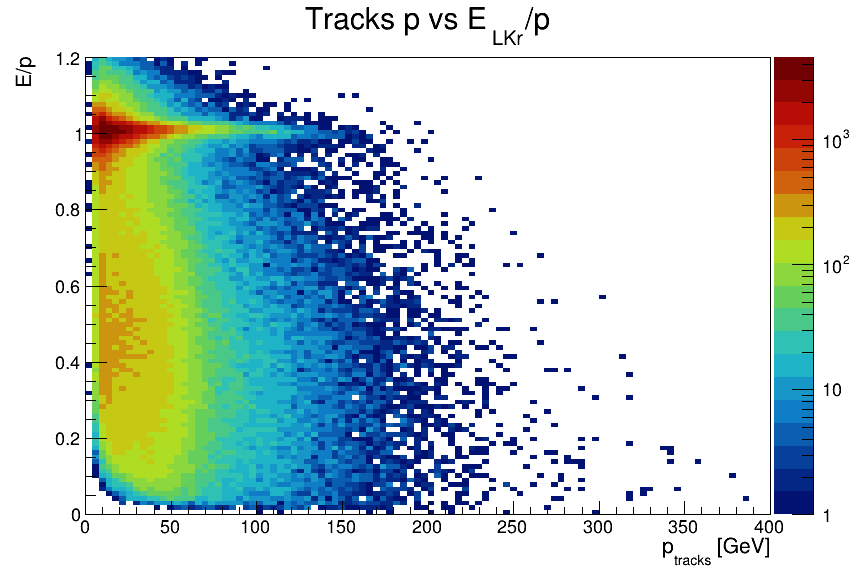

In [32]:
lkr_PvsEoP_muv12fand = df_muv12_f_and.Histo2D(("lkr_PvsEoP_muv12fand","lkr_PvsEoP_muv12fand",100,0,400,100,0,1.2),"Tracks_p","Tracks_lkrEoP")
clkr_PvsEoP_muv12fand = ROOT.TCanvas("clkr_PvsEoP_muv12fand","clkr_PvsEoP_muv12fand",860,600)
clkr_PvsEoP_muv12fand.SetLogz()
ROOT.gStyle.SetOptStat(0)
ROOT.gStyle.SetPalette(ROOT.kRainBow)
lkr_PvsEoP_muv12fand.SetTitle("Tracks p vs E_{LKr}/p")
lkr_PvsEoP_muv12fand.GetXaxis().SetTitleSize(0.04)
lkr_PvsEoP_muv12fand.GetYaxis().SetTitleSize(0.04)
lkr_PvsEoP_muv12fand.SetXTitle("p_{tracks} [GeV]")
lkr_PvsEoP_muv12fand.SetYTitle("E/p")
lkr_PvsEoP_muv12fand.Draw("COLZ")
clkr_PvsEoP_muv12fand.Draw()
clkr_PvsEoP_muv12fand.SaveAs("./"+saveDir+"/lkr_PvsEoP_muv12fand.png")

Warning in <TCanvas::Constructor>: Deleting canvas with same name: clkr_EvsEoP_muv12fand
Info in <TCanvas::Print>: png file ./checkSaturatedEvents_v2/lkr_EvsEoP_muv12fand.png has been created


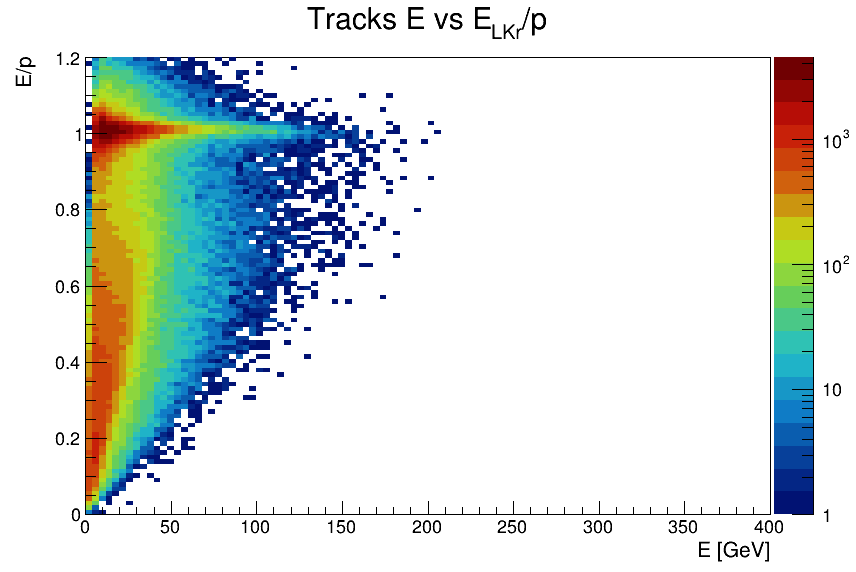

In [33]:
lkr_EvsEoP_muv12fand = df_muv12_f_and.Histo2D(("lkr_EvsEoP_muv12fand","lkr_EvsEoP_muv12fand",100,0,400,100,0,1.2),"Tracks_lkrE","Tracks_lkrEoP")
clkr_EvsEoP_muv12fand = ROOT.TCanvas("clkr_EvsEoP_muv12fand","clkr_EvsEoP_muv12fand",860,600)
clkr_EvsEoP_muv12fand.SetLogz()
ROOT.gStyle.SetOptStat(0)
ROOT.gStyle.SetPalette(ROOT.kRainBow)
lkr_EvsEoP_muv12fand.SetTitle("Tracks E vs E_{LKr}/p")
lkr_EvsEoP_muv12fand.GetXaxis().SetTitleSize(0.04)
lkr_EvsEoP_muv12fand.GetYaxis().SetTitleSize(0.04)
lkr_EvsEoP_muv12fand.SetXTitle("E [GeV]")
lkr_EvsEoP_muv12fand.SetYTitle("E/p")
lkr_EvsEoP_muv12fand.Draw("COLZ")
clkr_EvsEoP_muv12fand.Draw()
clkr_EvsEoP_muv12fand.SaveAs("./"+saveDir+"/lkr_EvsEoP_muv12fand.png")

# Check $E_{LKr}/p$ > 0.4

In [37]:
df_muv12_f_and_EoPgt0p4 = df_muv12_f_and.Filter("Tracks_lkrEoP>0.4&&DeltaE>0")

Warning in <TCanvas::Constructor>: Deleting canvas with same name: clkr_PvsDeltaE_muv12fand
Info in <TCanvas::Print>: png file ./checkSaturatedEvents_v2/lkr_PvsDeltaE_muv12fand.png has been created


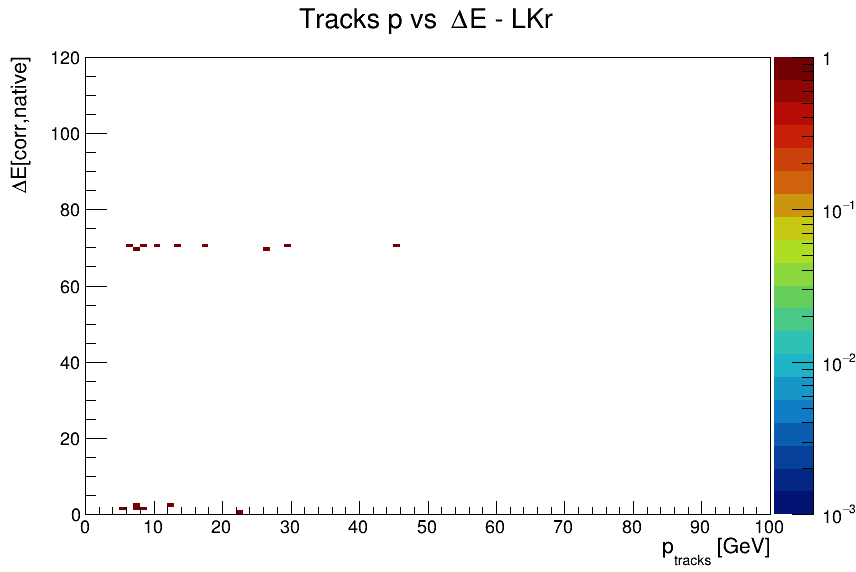

In [38]:
lkr_PvsDeltaE_muv12fand = df_muv12_f_and_EoPgt0p4.Histo2D(("lkr_PvsDeltaE_muv12fand","lkr_PvsDeltaE_muv12fand",100,0,100,120,0,120),"Tracks_p","DeltaE")
clkr_PvsDeltaE_muv12fand = ROOT.TCanvas("clkr_PvsDeltaE_muv12fand","",860,600)
clkr_PvsDeltaE_muv12fand.SetLogz()
ROOT.gStyle.SetOptStat(0)
ROOT.gStyle.SetPalette(ROOT.kRainBow)
lkr_PvsDeltaE_muv12fand.SetTitle("Tracks p vs #DeltaE - LKr")
lkr_PvsDeltaE_muv12fand.GetXaxis().SetTitleSize(0.04)
lkr_PvsDeltaE_muv12fand.GetYaxis().SetTitleSize(0.04)
lkr_PvsDeltaE_muv12fand.SetXTitle("p_{tracks} [GeV]")
lkr_PvsDeltaE_muv12fand.SetYTitle("#DeltaE[corr,native]")
lkr_PvsDeltaE_muv12fand.Draw("COLZ")
clkr_PvsDeltaE_muv12fand.Draw()
clkr_PvsDeltaE_muv12fand.SaveAs("./"+saveDir+"/lkr_PvsDeltaE_muv12fand.png")


In [39]:
print("Number of Events: ", lkr_PvsDeltaE_muv12fand.GetEntries())

Number of Events:  16.0


In [40]:
df_muv12_f_and_EoPgt0p4 = df_muv12_f_and_EoPgt0p4.Display(("EventID","Sat","SeedE","NeighbourE","DeltaE","DS_LKrE","corrEnergy"),100) 
df_muv12_f_and_EoPgt0p4.Print()

+--------+---------+-----+---------------+---------------+------------+-----------+------------+
| Row    | EventID | Sat | SeedE         | NeighbourE    | DeltaE     | DS_LKrE   | corrEnergy | 
+--------+---------+-----+---------------+---------------+------------+-----------+------------+
| 14000  | 131567  | 1   | 0.00082572835 | 0.0015679218  | 70.000000  | 6.6032116 | 76.603212  | 
+--------+---------+-----+---------------+---------------+------------+-----------+------------+
| 27219  | 529759  | 1   | 0.0013074201  | 0.0017285230  | 70.000000  | 5.1616747 | 75.161675  | 
+--------+---------+-----+---------------+---------------+------------+-----------+------------+
| 51933  | 74124   | 0   | 0.00096463640 | 0.00024437962 | 1.0205788  | 3.4588025 | 2.4382237  | 
+--------+---------+-----+---------------+---------------+------------+-----------+------------+
| 56061  | 822551  | 0   | 0.0010803440  | 0.00065431602 | 1.5639916  | 3.5754431 | 5.1394346  | 
+--------+---------+-----

# Check 0.95 < $E_{LKr}/p$ < 1.05

In [41]:
df_muv12_f_and_EoPin0p95to1p05 = df_muv12_f_and.Filter("Tracks_lkrEoP>0.95&&Tracks_lkrEoP<1.05&&DeltaE>0")

Info in <TCanvas::Print>: png file ./checkSaturatedEvents_v2/lkr_PvsDeltaE_muv12fand_EoPin0p95to1p05.png has been created


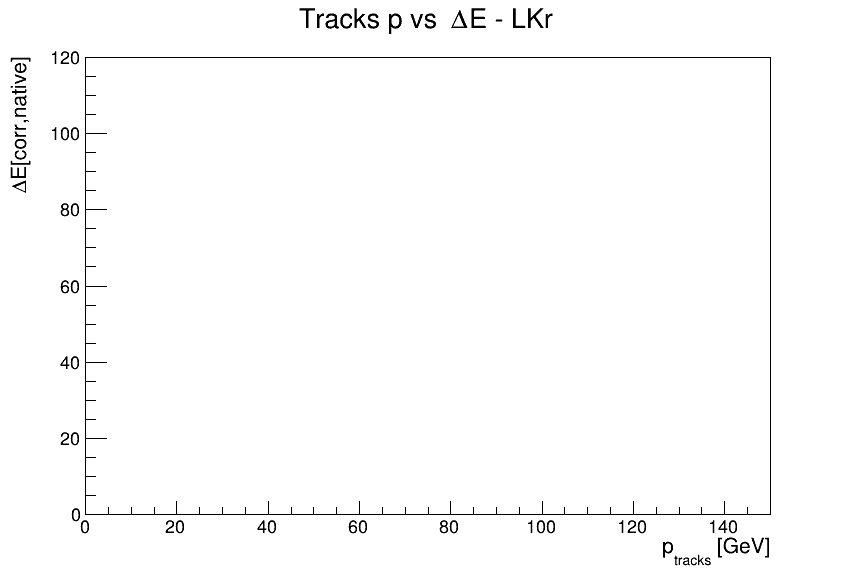

In [42]:
lkr_PvsDeltaE_muv12fand_EoPin0p95to1p05 = df_muv12_f_and_EoPin0p95to1p05.Histo2D(("lkr_PvsDeltaE_muv12fand_EoPin0p95to1p05","lkr_PvsDeltaE_muv12fand_EoPin0p95to1p05",150,0,150,120,0,120),"Tracks_p","DeltaE")
clkr_PvsDeltaE_muv12fand_EoPin0p95to1p05 = ROOT.TCanvas("clkr_PvsDeltaE_muv12fand_EoPin0p95to1p05","",860,600)
clkr_PvsDeltaE_muv12fand_EoPin0p95to1p05.SetLogz()
ROOT.gStyle.SetOptStat(0)
ROOT.gStyle.SetPalette(ROOT.kRainBow)
lkr_PvsDeltaE_muv12fand_EoPin0p95to1p05.SetTitle("Tracks p vs #DeltaE - LKr")
lkr_PvsDeltaE_muv12fand_EoPin0p95to1p05.GetXaxis().SetTitleSize(0.04)
lkr_PvsDeltaE_muv12fand_EoPin0p95to1p05.GetYaxis().SetTitleSize(0.04)
lkr_PvsDeltaE_muv12fand_EoPin0p95to1p05.SetXTitle("p_{tracks} [GeV]")
lkr_PvsDeltaE_muv12fand_EoPin0p95to1p05.SetYTitle("#DeltaE[corr,native]")
lkr_PvsDeltaE_muv12fand_EoPin0p95to1p05.Draw("COLZ")
clkr_PvsDeltaE_muv12fand_EoPin0p95to1p05.Draw()
clkr_PvsDeltaE_muv12fand_EoPin0p95to1p05.SaveAs("./"+saveDir+"/lkr_PvsDeltaE_muv12fand_EoPin0p95to1p05.png")

In [44]:
print("Number of Events: ", lkr_PvsDeltaE_muv12fand_EoPin0p95to1p05.GetEntries())

Number of Events:  0.0
